# Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\PC\Downloads\MM-2023 Instacart Basket Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

## Step 2

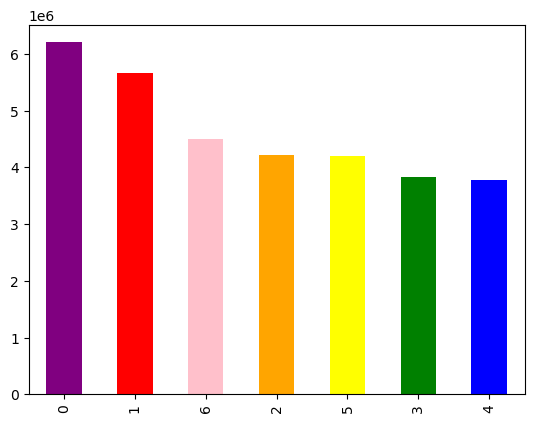

In [5]:
# Saving coloured bar chart
bar = df['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [7]:
# Exporting bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

In [11]:
# Checking prices mean
df['prices'].mean()

11.98022563868701

In [12]:
# Checking prices median
df['prices'].median()

7.4

In [13]:
# Checking prices max
df['prices'].max()

99999.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

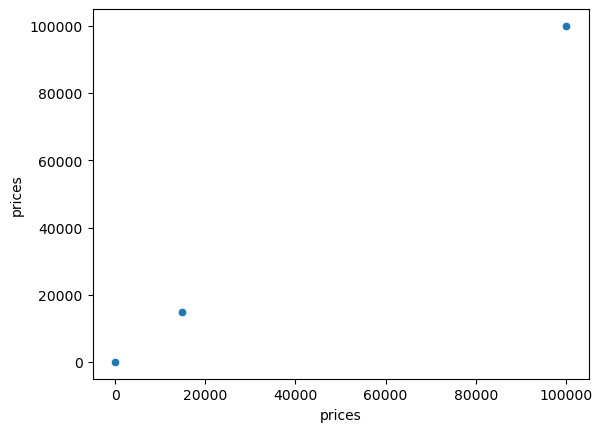

In [16]:
# Creating scatter plot
sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [18]:
# Filtering for prices above $100
df.loc[df['prices'] > 100]

,user_id,First Name,Surname,Gender,State,Age,date_joined,n_dependants,fam_status,income,...,prices,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,average_dspo,frequency_flag
5547,117740,Lisa,Sparks,Female,Oregon,55,1/1/2017,1,married,292759,...,14900.0,Regularly busy,Busiest days,Fewest orders,84,Loyal customer,36.928431,High spender,5.108268,Frequent customer
10303,31590,Beverly,Sanford,Female,Montana,46,1/1/2017,0,single,154076,...,14900.0,Regularly busy,Busiest days,Fewest orders,38,Regular customer,58.139865,High spender,10.104530,Regular customer
27945,100958,Benjamin,Parsons,Male,North Dakota,18,1/2/2017,2,living with parents and siblings,113408,...,14900.0,Regularly busy,Regularly busy,Most orders,5,New customer,627.991667,High spender,18.415584,Regular customer
27946,100958,Benjamin,Parsons,Male,North Dakota,18,1/2/2017,2,living with parents and siblings,113408,...,14900.0,Busiest day,Busiest days,Fewest orders,5,New customer,627.991667,High spender,18.415584,Regular customer
27947,100958,Benjamin,Parsons,Male,North Dakota,18,1/2/2017,2,living with parents and siblings,113408,...,14900.0,Busiest day,Busiest days,Fewest orders,5,New customer,627.991667,High spender,18.415584,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32390922,5519,Kathy,Daniel,Female,Georgia,78,4/1/2020,3,married,262610,...,14900.0,Regularly busy,Regularly busy,Most orders,53,Loyal customer,69.638604,High spender,6.627807,Frequent customer
32390923,5519,Kathy,Daniel,Female,Georgia,78,4/1/2020,3,married,262610,...,14900.0,Regularly busy,Regularly busy,Fewest orders,53,Loyal customer,69.638604,High spender,6.627807,Frequent customer
32390924,5519,Kathy,Daniel,Female,Georgia,78,4/1/2020,3,married,262610,...,14900.0,Regularly busy,Regularly busy,Fewest orders,53,Loyal customer,69.638604,High spender,6.627807,Frequent customer
32396990,140589,Clarence,Harper,Male,Maryland,26,4/1/2020,0,single,154845,...,99999.0,Regularly busy,Regularly busy,Most orders,9,New customer,876.974783,High spender,19.330097,Regular customer


In [19]:
# Replacing values above 100 with NaN
df.loc[df['prices'] >100, 'prices'] = np.nan

In [20]:
# Checking prices max again
df['prices'].max()

25.0

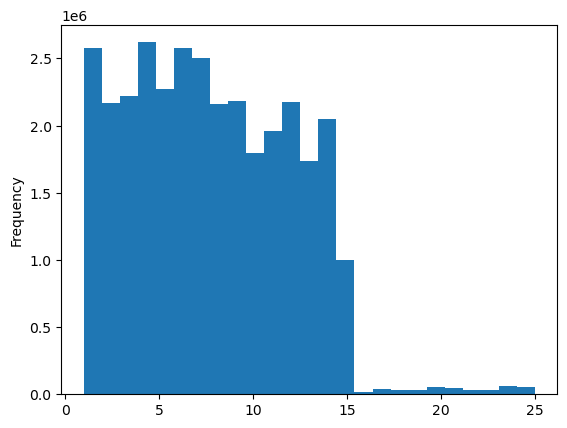

In [21]:
# Saving histogram
hist = df['prices'].plot.hist(bins = 25)

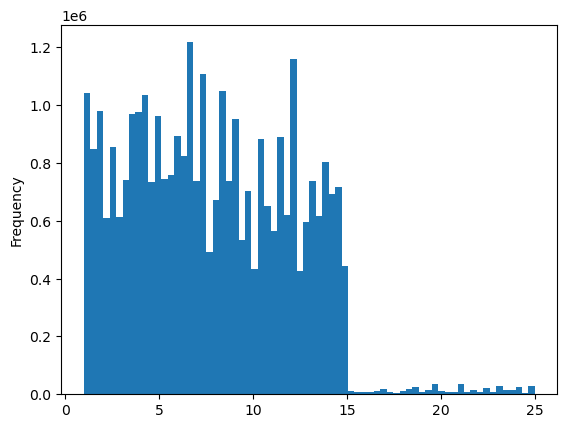

In [23]:
# Saving histogram with more bins
hist2 = df['prices'].plot.hist(bins = 70)

## Sampling data

In [25]:
# Creating random seed
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [38]:
# Store 70% of dataframe in big and 30% in small
big = df[dev]
small = df[~dev]

In [42]:
# Subsetting small dataframe to use for the line chart
df_line = small[['orders_day_of_week','prices']]

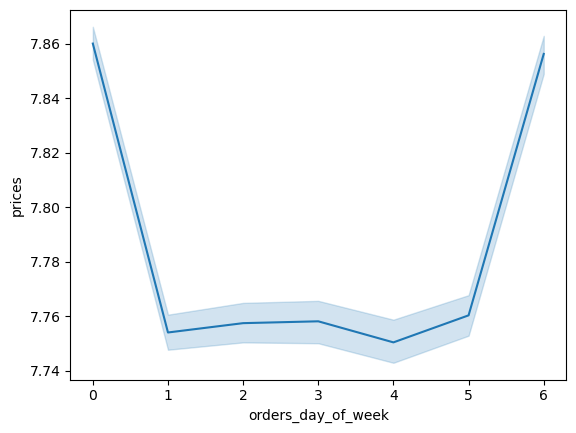

In [43]:
# Creating line chart
line = sns.lineplot(data = df_line, x = 'orders_day_of_week',y = 'prices')

## Step 3

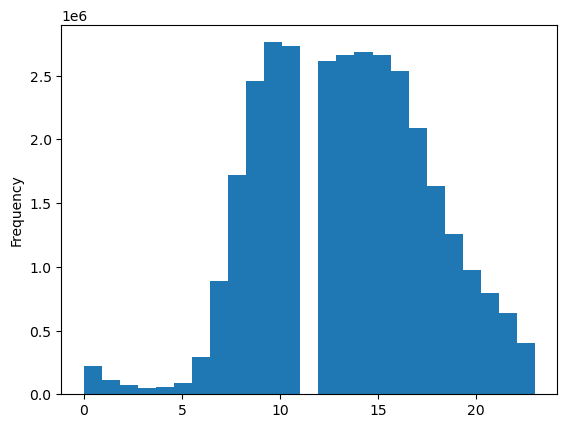

In [44]:
# Creating hour of day histogram
hist3 = df['order_hour_of_day'].plot.hist(bins = 25)

Generally orders do not really happen in the early hours of the day, most orders happen in the middle of the day. I have no clue what is causing that hole in the middle of the histogram.

## Step 4

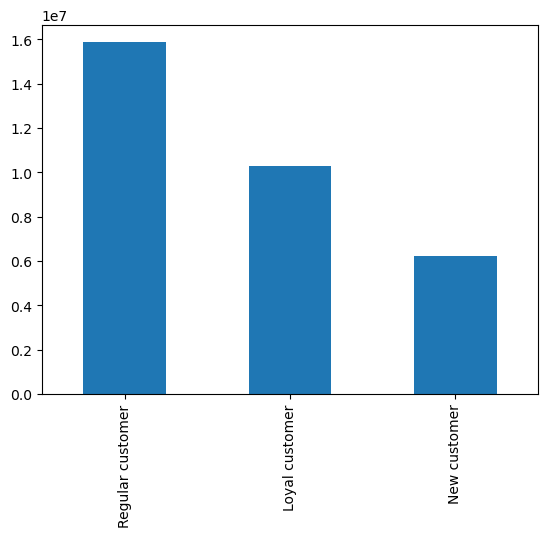

In [54]:
# Creating loyalty flag bar chart
bar2 = df['loyalty_flag'].value_counts().plot.bar()

## Step 5

In [55]:
# Subsetting small dataframe to use for the line chart
df_line2 = small[['order_hour_of_day','prices']]

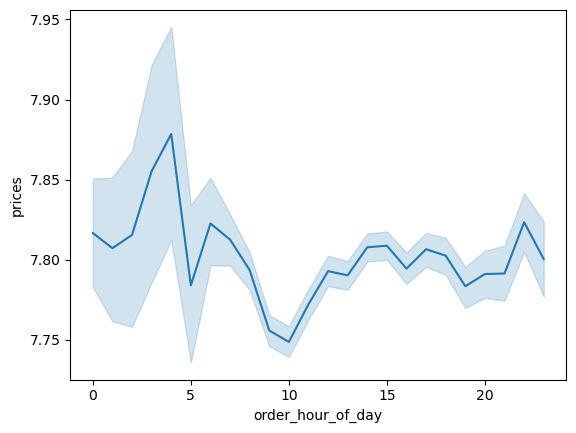

In [56]:
# Creating line chart for hour of day vs prices
line2 = sns.lineplot(data = df_line2, x = 'order_hour_of_day',y = 'prices')

## Step 6

In [57]:
# Subsetting small dataframe to use for the line chart
df_line3 = small[['n_dependants','Age']]

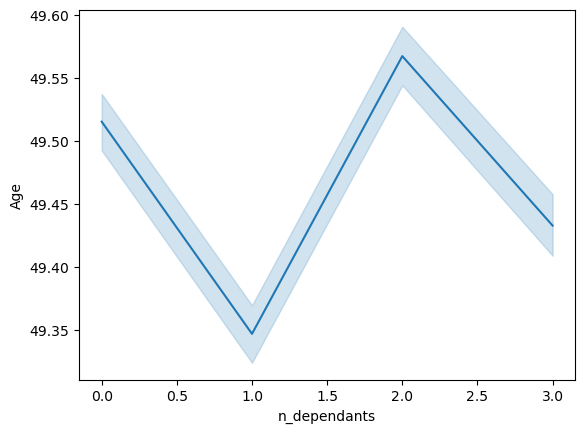

In [58]:
# Creating line chart for dependants vs age
line3 = sns.lineplot(data = df_line3, x = 'n_dependants',y = 'Age')

## Step 7

In [61]:
# Calculating average price
df['average_price'] = df.groupby(['user_id'])['prices'].transform(np.mean)

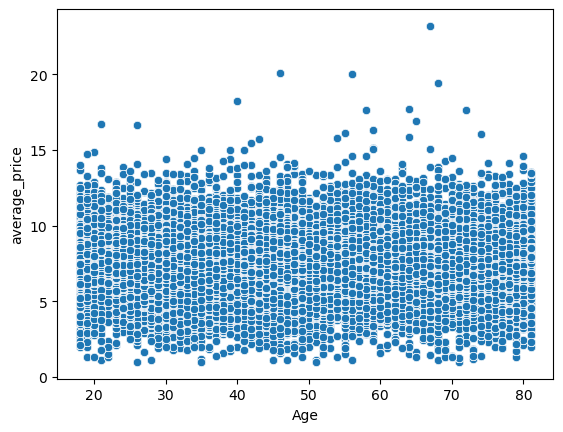

In [62]:
# Creating scatter plot
sp = sns.scatterplot(x = 'Age', y = 'average_price',data = df)

Doesn't really seem like there is much of a common thread between these two factors. At least not one I can find from this scatterplot.

## Step 8

In [64]:
# Exporting charts
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_dow.png'))
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_dow.png'))
line3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_dow.png'))

sp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot.png'))

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices25.png'))
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices70.png'))
hist3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_dow.png'))